In [1]:
#importing libraries
import pandas as pd 


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**LOADING DATA AND PERFORMING EDA**

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape
#columns =12
#rows = 891 

(891, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isna().mean().sort_values(ascending=False) #percentage of missing values in each column

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

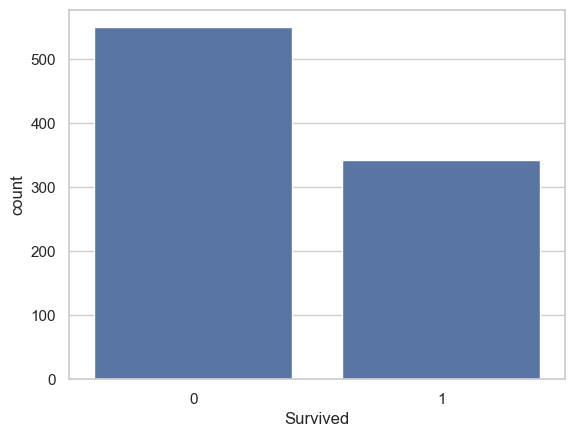

In [9]:
sns.set(style='whitegrid')
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Age', ylabel='Count'>

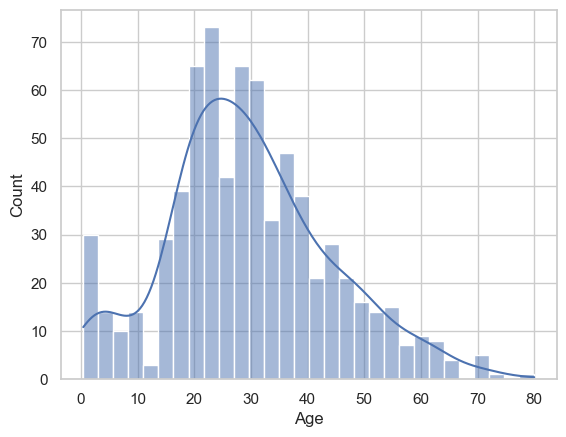

In [10]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)

**HANDLING MISSING VALUES NOW**

In [11]:
#DROPPING CABIN NUMBER BECAUSE IT HAS TOO MANY MISSING VALUES
cleaned_df = df.drop(columns=['Cabin'])
cleaned_df.isna().mean().sort_values(ascending=False) #check missing values again

Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [12]:
#also dropping 'PassengerId' as it is not useful for prediction
cleaned_df = cleaned_df.drop(columns=['PassengerId'])

#dropping 'Name' as it is not useful for prediction
cleaned_df = cleaned_df.drop(columns=['Name'])  

In [13]:
#imputing the missing values in 'Age' with the median age based on class and sex
cleaned_df["Age"] = cleaned_df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))


In [14]:
#imputing the missing values in 'Embarked' with the mode
cleaned_df['Embarked'] = cleaned_df['Embarked'].fillna(cleaned_df['Embarked'].mode()[0])

In [15]:
cleaned_df.isna().mean().sort_values(ascending=False) #check missing values again

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

**feature engineering now**

In [16]:
#listing categorical columns and numerical columns
ct_cols = cleaned_df.select_dtypes(include=['object']).columns.tolist() #categorical columns
nm_cols =   cleaned_df.select_dtypes(exclude=['object']).columns.tolist() #numerical columns

In [17]:
ct_cols

['Sex', 'Ticket', 'Embarked']

In [18]:
#dropping ticket column as it is not useful for prediction
cleaned_df = cleaned_df.drop(columns=['Ticket'])
ct_cols.remove('Ticket')
ct_cols

['Sex', 'Embarked']

In [19]:
nm_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [20]:
#encosing the categorical columns based on one hot encoding
#this will convert categorical columns into dummy variables
cleaned_df = pd.get_dummies(cleaned_df, columns=ct_cols, drop_first=True)

In [21]:
cleaned_df.info() #check the dataframe info after one hot encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [22]:
#scaling some the numerical columns
scale_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaled_df = cleaned_df.copy()
scaled_df[scale_cols] = StandardScaler().fit_transform(scaled_df[scale_cols])

In [23]:
# Define target column
target_col = "Survived"

# Scaled features
X_scaled = scaled_df.drop(target_col, axis=1)
y_scaled = scaled_df[target_col]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)


***training 4 models***

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**USING ONLY THE SCALED DATA**

# Fit all on X_train_scaled


In [25]:
# Fit all on X_train_scaled
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_scaled)


LogisticRegression(max_iter=1000)

In [26]:
# Fit all on X_train_scaled
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train_scaled)

SVC(probability=True)

In [27]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train_scaled)  

RandomForestClassifier()

In [28]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train_scaled)

GradientBoostingClassifier()

In [29]:
for name, model in zip(
    ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting'],
    [log_reg, svm_model, rf_model, gb_model]
):
    acc = accuracy_score(y_test_scaled, model.predict(X_test_scaled))
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8212
SVM Accuracy: 0.8156
Random Forest Accuracy: 0.8101
Gradient Boosting Accuracy: 0.8212


In [30]:
for name, model in zip(
    ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting'],
    [log_reg, svm_model, rf_model, gb_model]
):
    acc = accuracy_score(y_train_scaled, model.predict(X_train_scaled))
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8062
SVM Accuracy: 0.8357
Random Forest Accuracy: 0.9789
Gradient Boosting Accuracy: 0.9059


***using hyperparameter tunning on the models to try and get better testing accuracies before combing models***

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
    },
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs', 'saga'],
    },
    {
        'penalty': ['none'],
        'solver': ['lbfgs', 'saga'],
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
    },
]


In [33]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [34]:
grid_search.fit(X_train_scaled, y_train_scaled)

c:\Users\ayoba\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ayoba\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayoba\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\ayoba\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
   

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['liblinear', 'lbfgs', 'saga']},
                         {'penalty': ['none'], 'solver': ['lbfgs', 'saga']},
                         {'C': [0.01, 0.1, 1],
                          'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [35]:
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'saga'}
Best accuracy: 0.806126268098099


**RANDOM FRST**

In [36]:
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=2)

In [38]:
grid_search_rf.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 500, 700]},
             scoring='accuracy', verbose=2)

In [39]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best accuracy:", grid_search_rf.best_score_)

Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 700}
Best accuracy: 0.8300502314586822


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [41]:
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),  # e.g., 0.01–0.31
    'max_depth': randint(3, 7),           # Trees 3 to 6 deep
    'min_samples_split': randint(2, 11),  # 2 to 10
    'min_samples_leaf': randint(1, 5),    # 1 to 4
    'subsample': uniform(0.7, 0.3),       # 0.7 to 1.0
    'max_features': ['sqrt', 'log2']
}


In [42]:
gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=50,  # try 50 different combinations
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train_scaled)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 0.012759115484988894, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 448, 'subsample': 0.7851762924212397}
Best score: 0.8300206835418104


In [43]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [44]:
y_pred = random_search.best_estimator_.predict(X_test_scaled)


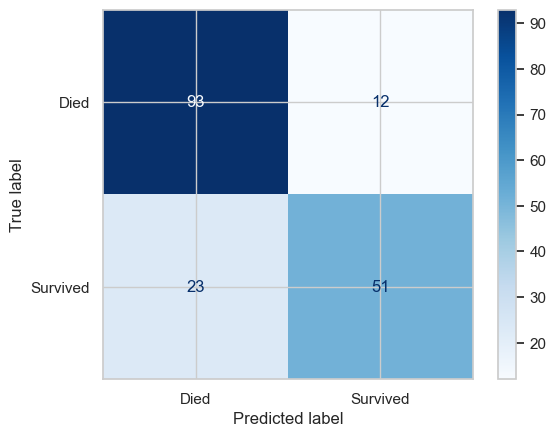

In [45]:
cm = confusion_matrix(y_test_scaled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
disp.plot(cmap='Blues')


In [46]:
print(classification_report(y_test_scaled, y_pred, target_names=['Died', 'Survived']))


              precision    recall  f1-score   support

        Died       0.80      0.89      0.84       105
    Survived       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [47]:
from sklearn.ensemble import VotingClassifier

# Best tuned models with found parameters
lr_best = LogisticRegression(
    C=0.1,
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.25,
    max_iter=10000,
    random_state=42
)

rf_best = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=700,
    random_state=42
)

gb_best = GradientBoostingClassifier(
    learning_rate=0.0128,
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=448,
    subsample=0.844,
    random_state=42
)



In [48]:
# Ensemble: Voting Classifier (soft = use probabilities)
ensemble = VotingClassifier(
    estimators=[
        ('lr', lr_best),
        ('rf', rf_best),
        ('gb', gb_best)
    ],
    voting='soft'  # you can also try 'hard'
)

# Train and evaluate
ensemble.fit(X_train_scaled, y_train_scaled)
y_pred_ensemble = ensemble.predict(X_test_scaled)




              precision    recall  f1-score   support

        Died       0.81      0.90      0.85       105
    Survived       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



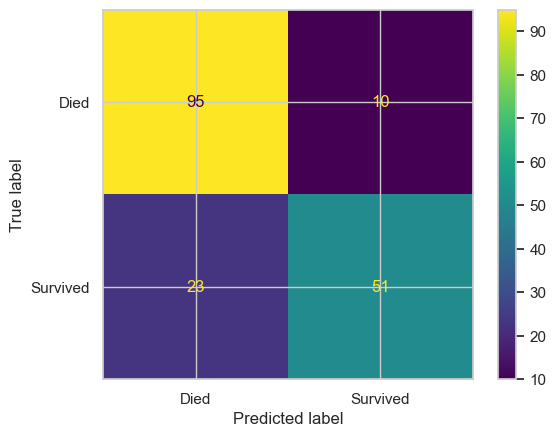

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test_scaled, y_pred_ensemble, target_names=["Died", "Survived"]))

ConfusionMatrixDisplay.from_estimator(ensemble, X_test_scaled, y_test_scaled, display_labels=["Died", "Survived"])

*testing with test dataset**

In [50]:
test_data = pd.read_csv('test.csv')

In [51]:
passenger_ids = test_data['PassengerId']

In [52]:
#DROPPING CABIN NUMBER BECAUSE IT HAS TOO MANY MISSING VALUES
test_cleaned_df = test_data.drop(columns=['Cabin'])
test_cleaned_df.isna().mean().sort_values(ascending=False) #check missing values again

Age            0.205742
Fare           0.002392
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.000000
dtype: float64

In [53]:
#also dropping 'PassengerId' as it is not useful for prediction
test_cleaned_df = test_cleaned_df.drop(columns=['PassengerId'])

#dropping 'Name' as it is not useful for prediction
test_cleaned_df = test_cleaned_df.drop(columns=['Name'])  

In [54]:
#imputing the missing values in 'Age' with the median age based on class and sex
test_cleaned_df["Age"] = test_cleaned_df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))

In [55]:
#imputing the missing values in 'Embarked' with the mode
test_cleaned_df['Embarked'] = test_cleaned_df['Embarked'].fillna(test_cleaned_df['Embarked'].mode()[0])

In [58]:
test_cleaned_df.isna().mean().sort_values(ascending=False) #check missing values again

Fare        0.002392
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Embarked    0.000000
dtype: float64

In [59]:
test_cleaned_df['Fare'] = test_cleaned_df['Fare'].fillna(test_cleaned_df['Fare'].mode()[0])

In [60]:
test_cleaned_df.isna().mean().sort_values(ascending=False) #check missing values again

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [61]:
test_ct_cols = test_cleaned_df.select_dtypes(include=['object']).columns.tolist() #categorical columns
test_nm_cols =   test_cleaned_df.select_dtypes(exclude=['object']).columns.tolist() #numerical columns

In [62]:
test_cleaned_df = test_cleaned_df.drop(columns=['Ticket'])

In [63]:
test_ct_cols.remove('Ticket')

In [64]:
test_ct_cols

['Sex', 'Embarked']

In [65]:
test_cleaned_df = pd.get_dummies(test_cleaned_df, columns=test_ct_cols, drop_first=True)


In [66]:
test_cleaned_df[scale_cols] = StandardScaler().fit_transform(test_cleaned_df[scale_cols])


In [67]:
test_cleaned_df

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0.399451,-0.499470,-0.400248,-0.497063,True,True,False
1,3,1.359273,0.616992,-0.400248,-0.511926,False,False,True
2,2,2.511059,-0.499470,-0.400248,-0.463754,True,True,False
3,3,-0.176442,-0.499470,-0.400248,-0.482127,True,False,True
4,3,-0.560371,0.616992,0.619896,-0.417151,False,False,True
...,...,...,...,...,...,...,...,...
413,3,-0.406799,-0.499470,-0.400248,-0.493105,True,False,True
414,1,0.744987,-0.499470,-0.400248,1.314557,False,False,False
415,3,0.706594,-0.499470,-0.400248,-0.507445,True,False,True
416,3,-0.406799,-0.499470,-0.400248,-0.493105,True,False,True


In [68]:
final_predictions = ensemble.predict(test_cleaned_df)

In [69]:
submission_df = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": final_predictions
})

submission_df.to_csv("submission.csv", index=False)
